In [2]:
%matplotlib notebook
import lmfit
import numpy as np
from matplotlib import pyplot as plt


### Defining decaying sin wave

Function accepts dictionary of parameters and array of x-points, returns array of y-points. Represents fit model.

In [3]:
def decaying_sin(params, x):
    amp = params['amp']
    phaseshift = params['phase']
    freq = params['frequency']
    decay = params['decay']
    return amp * np.sin(x*freq + phaseshift) * np.exp(-x*x*decay)


### Plotting function for default parameters

Define 100 points on x-axis. Constructing dictionary with initial parameter values for decaying_sin.

<IPython.core.display.Javascript object>


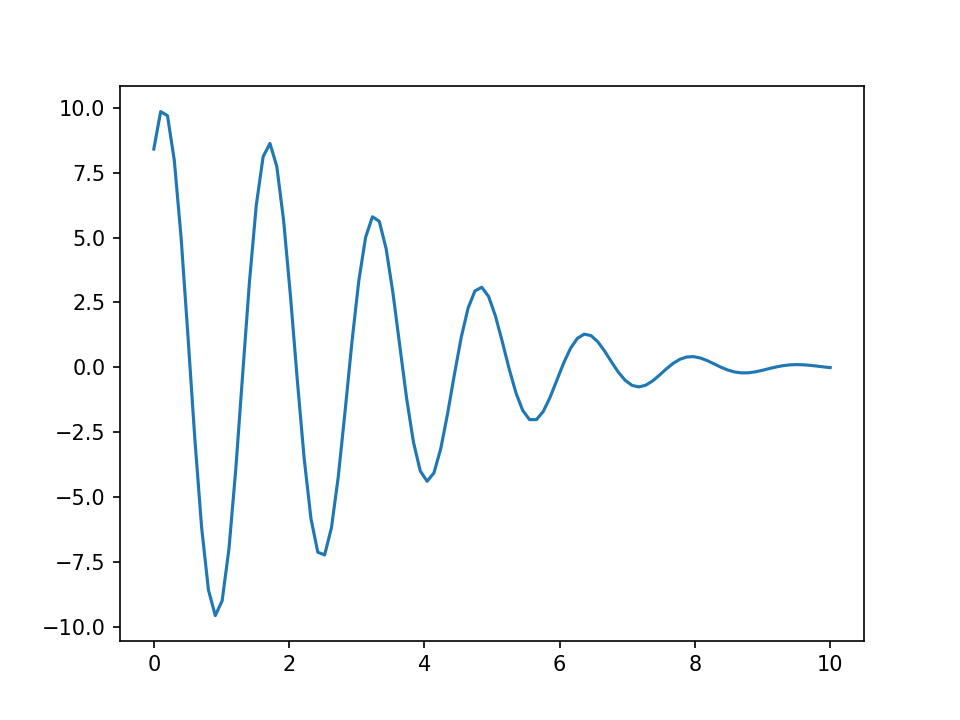

In [4]:
x = np.linspace(0.0, 10.0, 100)
default_params = {"amp" : 10.0, "decay" : 0.05, "phase" : 1.0, "frequency" : 4.0}
data = decaying_sin(default_params, x)

eps = np.linspace(0.0, 10.0, 100)
eps.fill(0.01)

a = plt.plot(x, data)

### Defining objective function

Objective function requires array of errors `eps`. Will return array of residuals using `data` array defined earlier.

In [5]:

def objective_function(params):
    model = decaying_sin(params, x)
    return (data - model) / eps

In [6]:
params = lmfit.Parameters()
params.add('amp', value=1)
params.add('decay', value=0.1)
params.add('phase', value=0.1)
params.add('frequency', value=1.0)

<IPython.core.display.Javascript object>


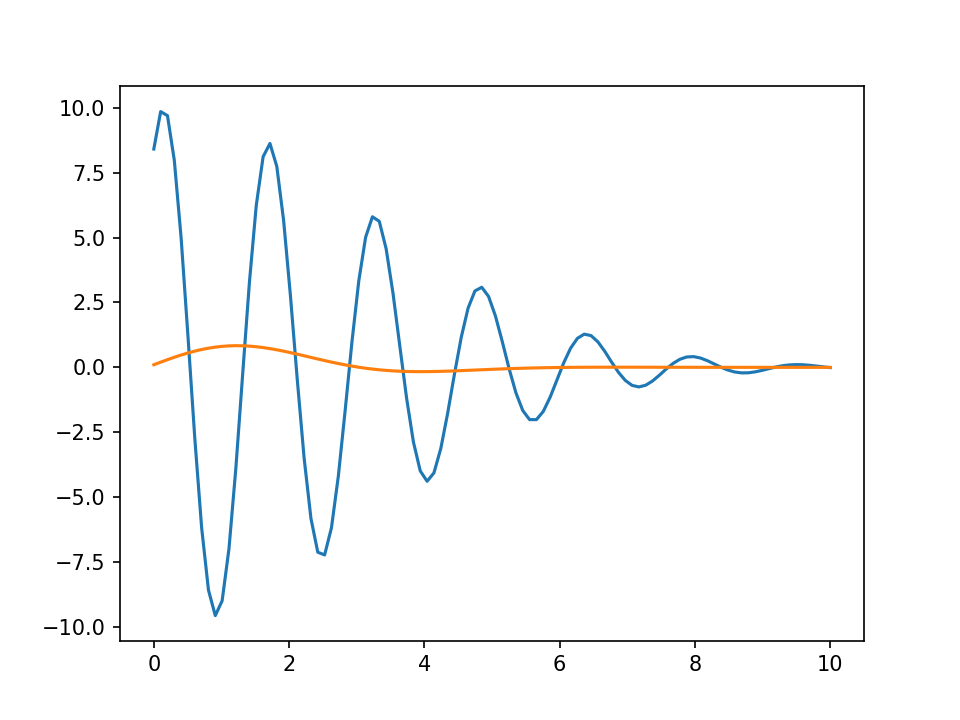

In [7]:
fig, ax = plt.subplots()
a = ax.plot(x, data)
b = ax.plot(x, decaying_sin(params, x))


<IPython.core.display.Javascript object>


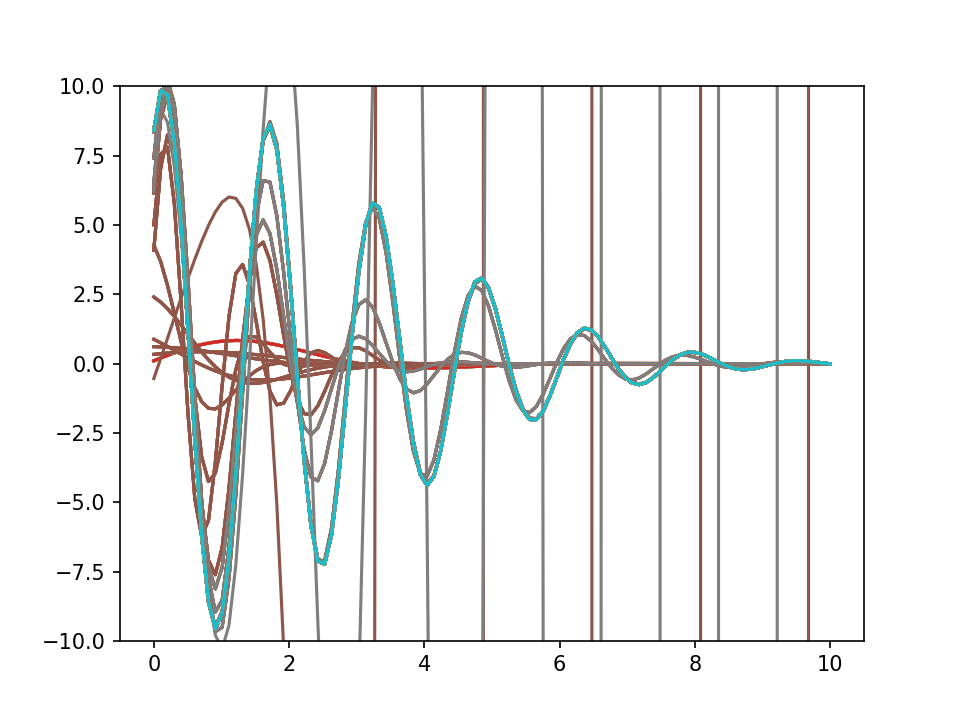

In [8]:
fig, ax2 = plt.subplots()

def plotter(params, a, b):
    current_data = decaying_sin(params, x)
    ax2.plot(x, data)
    ax2.plot(x, current_data)
    axes = plt.gca()
    axes.set_ylim(-10.0, 10.0)    


In [9]:

out = lmfit.minimize(objective_function, params, iter_cb=plotter)

In [10]:
out.params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp              10     -inf      inf 1.226e-15     True     None     None
decay          0.05     -inf      inf 1.462e-17     True     None     None
frequency         4     -inf      inf 7.996e-17     True     None     None
phase             1     -inf      inf 1.814e-16     True     None     None
